## Inporting useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.decomposition import PCA

## Importing dataset

In [2]:
df1=pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json",lines = True)
df2 = pd.read_json("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json",lines=True)

## Visualizing Dataset 

In [3]:
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df1.shape, df2.shape

((26709, 3), (28619, 3))

In [6]:
# Concatinating both datasets
df=pd.concat([df1,df2])
df.reset_index(drop=True,inplace=True)

In [7]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
# Extracting only useful data (article_link have no use for sarcasm detection)

data=df[["headline","is_sarcastic"]]
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


# Preprocessing the Data
* Remove punctuations and numbers
* Lowercase
* Stemming
* Removing Stopwords

In [9]:
# Stopwords
stops=stopwords.words("english")

In [10]:
# Generating Corpus

corpus=[]

for i in range(data.shape[0]):
    headline = re.sub("[^a-zA-Z]"," ",data["headline"][i] )
    headline=headline.lower()
    headline=headline.split()
    ps=PorterStemmer()
    headline=[ps.stem(word) for word in headline if not word in set(stops)]
    headline='  '.join(headline)
    corpus.append(headline)

In [11]:
corpus

['former  versac  store  clerk  sue  secret  black  code  minor  shopper',
 'roseann  reviv  catch  thorni  polit  mood  better  wors',
 'mom  start  fear  son  web  seri  closest  thing  grandchild',
 'boehner  want  wife  listen  come  altern  debt  reduct  idea',
 'j  k  rowl  wish  snape  happi  birthday  magic  way',
 'advanc  world  women',
 'fascin  case  eat  lab  grown  meat',
 'ceo  send  kid  school  work  compani',
 'top  snake  handler  leav  sink  huckabe  campaign',
 'friday  morn  email  insid  trump  presser  age',
 'airlin  passeng  tackl  man  rush  cockpit  bomb  threat',
 'facebook  reportedli  work  healthcar  featur  app',
 'north  korea  prais  trump  urg  us  voter  reject  dull  hillari',
 'actual  cnn  jeffrey  lord  indefens',
 'barcelona  hold  huge  protest  support  refuge',
 'nuclear  bomb  deton  rehears  spider  man  music',
 'cosbi  lawyer  ask  accus  come  forward  smear  legal  team  year  ago',
 'stock  analyst  confus  frighten  boar  market',
 '

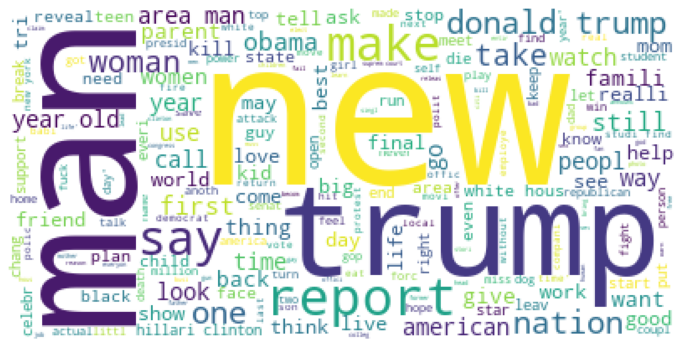

In [12]:
# Generating WordCloud

corpus_str=str(corpus)
cloud = WordCloud(relative_scaling = 1.0,background_color = "white").generate(corpus_str)

plt.figure(figsize = (12,10))
plt.imshow(cloud)
plt.axis("off")
plt.show()

# TF-IDF Vectorization
TF-IDF vectoriztion gives us the importance of each word in the data.

In [13]:
# Tfidf Vectorizing
# Taking most relevant 1500 words
vec=TfidfVectorizer(max_features=1500)
X = vec.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=vec.get_feature_names())
t_var = data.iloc[:, -1]

In [14]:
X.head()

,abandon,abort,absolut,abus,accept,access,accid,accident,accord,account,...,would,write,writer,wrong,ye,year,yet,york,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, t_var, test_size = 0.20, random_state = 0)

## Fitting the model

### XGBoost Classifier

In [16]:
# Fitting XGBoost

xgb_c=XGBClassifier(tree_method='gpu_hist', gpu_id=0)

xgb_c.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [17]:
# Predicting on test data
predict_xgb_c = xgb_c.predict(X_test)

In [18]:
confusion_matrix(y_test, predict_xgb_c)

print(classification_report(y_test, predict_xgb_c))

print("Accuracy score for XGBoost",accuracy_score(y_test, predict_xgb_c))
print("Roc_Auc score for XGBoost",roc_auc_score(y_test, predict_xgb_c))


              precision    recall  f1-score   support

           0       0.72      0.88      0.79      6032
           1       0.80      0.59      0.68      5034

    accuracy                           0.75     11066
   macro avg       0.76      0.73      0.74     11066
weighted avg       0.76      0.75      0.74     11066

Accuracy score for XGBoost 0.7477860112054943
Roc_Auc score for XGBoost 0.7349457376840139


* Using XGBoost gives us 74% Accuracy.
* Lets use PCA and see if our accuracy increases

### Using PCA

In [19]:
X.head()

,abandon,abort,absolut,abus,accept,access,accid,accident,accord,account,...,would,write,writer,wrong,ye,year,yet,york,young,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
pca=PCA()
X_pca=pca.fit_transform(X_scaled)


In [22]:
print(pca.explained_variance_,"\n")
print(np.sum(pca.explained_variance_),"\n")
print(pca.explained_variance_ratio_,"\n")
print(pca.explained_variance_ratio_ * 100,"\n") 

[2.36852086 2.2110249  2.06611414 ... 0.16727145 0.11821579 0.02620267] 

1500.0271115368269 

[1.57898537e-03 1.47398996e-03 1.37738453e-03 ... 1.11512285e-04
 7.88090994e-05 1.74681285e-05] 

[0.15789854 0.147399   0.13773845 ... 0.01115123 0.00788091 0.00174681] 



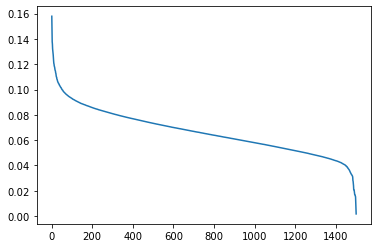

In [23]:
y = pca.explained_variance_ratio_ * 100
x = np.arange(1,1501)
plt.plot(x,y)
plt.show()

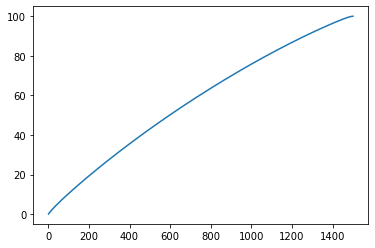

In [24]:
cumsum = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,1501)
plt.plot(x,cumsum)
plt.show()


In [25]:
cumsum

array([  0.15789854,   0.30529753,   0.44303599, ...,  99.99037228,
        99.99825319, 100.        ])

* We can use upto 90% of information content

In [26]:
(cumsum[cumsum<=90]).shape

(1263,)

* We can use 1263 components for upto 90% cumsum

In [27]:
col_list=[]
for i in np.arange(1,1501):
    c="PC"+str(i)
    col_list.append(c)
    
components = pd.DataFrame(X_pca,
                 columns = col_list,
                 index = X.index)


In [28]:
components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1491,PC1492,PC1493,PC1494,PC1495,PC1496,PC1497,PC1498,PC1499,PC1500
0,0.606791,-0.443108,-1.141356,-1.701959,-0.126471,-1.343356,0.727694,-1.479057,-1.169394,1.216306,...,0.157959,-0.123937,-0.129117,-0.190637,0.022597,0.374492,0.238466,-0.035854,0.006296,0.003872
1,0.023802,-0.048811,0.191507,0.492464,-0.174706,-0.105441,-1.078602,-0.165335,0.036659,-0.711682,...,-0.042176,0.184152,0.194741,0.073424,0.130781,0.081236,0.002444,0.021684,0.017134,0.003392
2,-1.832612,0.186885,0.743464,0.423201,-0.136278,0.924580,-0.563061,0.516763,1.213065,0.287220,...,0.051042,-0.060182,-0.068592,0.081270,0.043200,0.140256,0.108326,0.019371,-0.018519,-0.002625
3,0.063055,-0.585424,-0.194059,-0.028871,-0.230053,-0.020368,-0.019869,-0.295902,0.077386,-1.056599,...,0.122939,0.455607,0.051547,-0.063902,-0.054729,0.456817,-0.042517,-0.001635,-0.119070,0.001808
4,-1.565925,0.705875,0.473408,0.442122,0.265224,0.872286,-0.524802,0.306741,1.310925,-0.336371,...,0.092896,-0.027867,0.006635,-0.017593,-0.037140,0.473310,0.021721,-0.016554,0.024446,-0.004106


Now we will select 1263 pca components for our model

In [29]:
X_final = components.iloc[:,:1263]
X_final.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC1254,PC1255,PC1256,PC1257,PC1258,PC1259,PC1260,PC1261,PC1262,PC1263
0,0.606791,-0.443108,-1.141356,-1.701959,-0.126471,-1.343356,0.727694,-1.479057,-1.169394,1.216306,...,1.261043,-0.425372,1.420317,0.974530,-0.853749,-0.981404,0.791085,-0.702851,0.454799,0.526700
1,0.023802,-0.048811,0.191507,0.492464,-0.174706,-0.105441,-1.078602,-0.165335,0.036659,-0.711682,...,0.738604,-2.580684,0.164905,0.871649,0.257600,0.562884,1.740241,-1.808148,-0.406057,-0.423111
2,-1.832612,0.186885,0.743464,0.423201,-0.136278,0.924580,-0.563061,0.516763,1.213065,0.287220,...,-1.665418,0.379632,-0.409310,-0.296559,0.025236,0.451232,0.268092,0.995481,-1.029925,-0.643612
3,0.063055,-0.585424,-0.194059,-0.028871,-0.230053,-0.020368,-0.019869,-0.295902,0.077386,-1.056599,...,1.333619,-0.891563,0.187801,0.013291,-0.608232,0.238554,0.480132,0.545475,0.259920,0.123160
4,-1.565925,0.705875,0.473408,0.442122,0.265224,0.872286,-0.524802,0.306741,1.310925,-0.336371,...,-1.575503,-0.011619,1.467001,-0.098674,0.525492,-0.582612,-0.216492,-0.206392,0.085455,-0.957465


In [30]:
# Splitting the dataset into the Training set and Test set

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_final, t_var, test_size = 0.20, random_state = 0)

### XGBoost Classifier on PCA

In [31]:
# Fitting XGBoost

xgb_pca=XGBClassifier(tree_method='gpu_hist', gpu_id=0)
xgb_pca.fit(X_pca_train,y_pca_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [32]:
# Predicting on test data
y_pred_pca = xgb_pca.predict(X_pca_test)

In [33]:
confusion_matrix(y_pca_test, y_pred_pca)

print(classification_report(y_pca_test, y_pred_pca))

print("Accuracy score for XGBoost",accuracy_score(y_pca_test, y_pred_pca))
print("Roc_Auc score for XGBoost",roc_auc_score(y_pca_test, y_pred_pca))


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6032
           1       0.92      0.88      0.89      5034

    accuracy                           0.91     11066
   macro avg       0.91      0.90      0.91     11066
weighted avg       0.91      0.91      0.91     11066

Accuracy score for XGBoost 0.9062895355141876
Roc_Auc score for XGBoost 0.9037052025009774


We can see using PCA increased our accuracy to 90%